In [ ]:
"""
EDA
가장 많이 방문한 시간 10개 출력
가장 적게 방문한 시간 10개 출력
가장 많이 구매한 상품 10개 출력
가장 적게 구매한 상품 10개 출력
어떤 요일에 구매가 가장 많았는가?
어떤 월에 구매가 가장 많이 있는가?
연도별 판매량 비교
"""

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ex = pd.read_csv('ex_data.csv',parse_dates = ['Date'])
ex

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk
...,...,...,...
38760,4471,2014-08-10,sliced cheese
38761,2022,2014-02-23,candy
38762,1097,2014-04-16,cake bar
38763,1510,2014-03-12,fruit/vegetable juice


In [5]:
df = ex.groupby(['Member_number', 'Date'])['itemDescription'].apply(', '.join).reset_index()
df.sort_values(by = 'Date', ascending = True)
df['year'] = df.Date.dt.year
df['month'] = df.Date.dt.month
df['day'] = df.Date.dt.day
df['day_of_week'] = df.Date.dt.day_name()
df['Date'] = df.Date.dt.date
df

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1000,2014-06-24,"whole milk, pastry, salty snack",2014,6,24,Tuesday
1,1000,2015-03-15,"sausage, whole milk, semi-finished bread, yogurt",2015,3,15,Sunday
2,1000,2015-05-27,"soda, pickled vegetables",2015,5,27,Wednesday
3,1000,2015-07-24,"canned beer, misc. beverages",2015,7,24,Friday
4,1000,2015-11-25,"sausage, hygiene articles",2015,11,25,Wednesday
...,...,...,...,...,...,...,...
14958,4999,2015-05-16,"butter milk, whipped/sour cream",2015,5,16,Saturday
14959,4999,2015-12-26,"bottled water, herbs",2015,12,26,Saturday
14960,5000,2014-09-03,"fruit/vegetable juice, onions",2014,9,3,Wednesday
14961,5000,2014-11-16,"bottled beer, other vegetables",2014,11,16,Sunday


In [6]:
df.groupby('Date')['Member_number'].nunique().sort_values(ascending=False).head(10)
df.groupby('Date')['Member_number'].nunique().sort_values(ascending=False).tail(10)

Date
2015-10-20    11
2015-10-30    11
2015-12-21    11
2015-03-17    11
2015-02-02    11
2015-05-11    11
2015-03-06    10
2014-04-07    10
2015-03-16     9
2015-01-09     7
Name: Member_number, dtype: int64

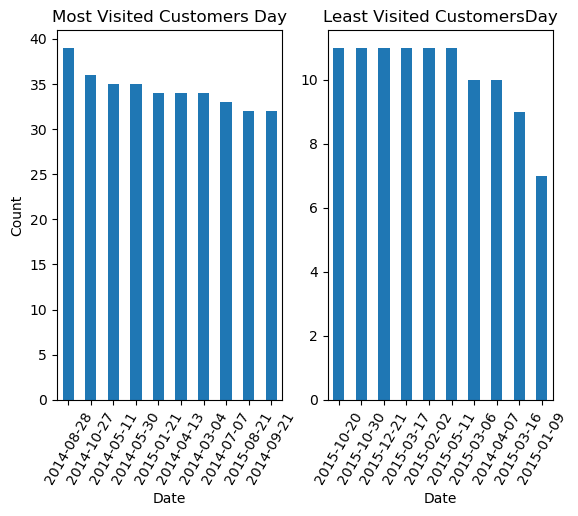

In [9]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
df.groupby('Date')['Member_number'].nunique().sort_values(ascending=False).head(10).plot(ax=ax1,
                                                 kind='bar',
                                                 title = 'Most Visited Customers Day')
ax1.set_xlabel('cus id')
ax1.set_ylabel('cnt')
df.groupby('Date')['Member_number'].nunique().sort_values(ascending=False).tail(10).plot(ax=ax2,
                                                                                         kind='bar',
                                                                                         title = 'Least Visited CustomersDay')
ax1.set_xticklabels(df.groupby('Date')['Member_number'].nunique().sort_values(ascending=False).head(10).index, rotation=60)
ax2.set_xticklabels(df.groupby('Date')['Member_number'].nunique().sort_values(ascending=False).tail(10).index, rotation=60)
ax1.set_xlabel('Date')
ax1.set_ylabel('Count')

plt.show()

In [22]:
# 방문자 상위,하위 10명
most_freq_visitor = df['Member_number'].value_counts().head(10)
most_freq_visitor

2271    11
1379    11
4338    11
3737    11
2193    11
3593    10
1052    10
2625    10
3484    10
4217    10
Name: Member_number, dtype: int64

In [31]:
lea_freq_visitor = df['Member_number'].value_counts().tail(10)
lea_freq_visitor

1

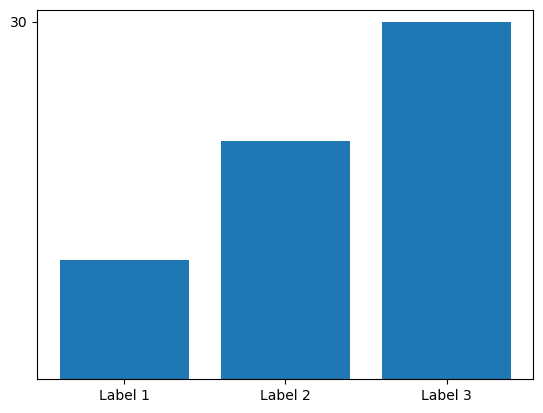

In [46]:
import matplotlib.pyplot as plt

# 예시 데이터
data = {
    'Label 1': 10,
    'Label 2': 20,
    'Label 3': 30,
}

# 가장 큰 값 찾기
max_value = max(data.values())

# 그래프 그리기
plt.bar(data.keys(), data.values())

# Y 레이블 설정
plt.yticks([max_value], [max_value])

# Y 축 범위 설정
plt.ylim(0, max_value + 1)  # +1을 통해 레이블 위로 여백을 만듭니다

plt.show()



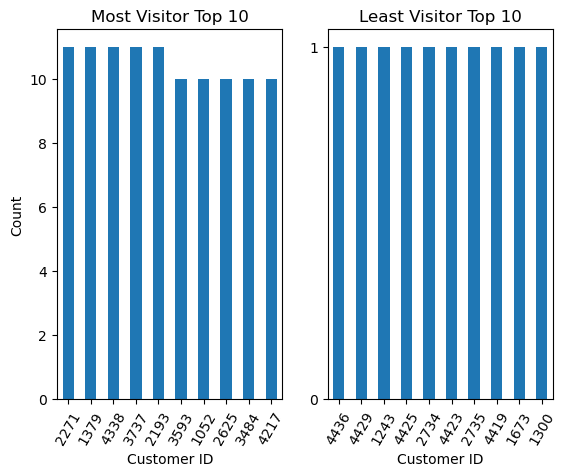

In [50]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
most_freq_visitor.plot(ax = ax1,
                       kind = 'bar',
                       title = 'Most Visitor Top 10')
ax1.set_xlabel('Customer ID')
ax1.set_ylabel("Count")

lea_freq_visitor.plot(ax = ax2,
                       kind = 'bar',
                       title = 'Least Visitor Top 10')
ax2.set_xlabel('Customer ID')

ax1.set_xticklabels(most_freq_visitor.index, rotation=60)
ax2.set_xticklabels(lea_freq_visitor.index, rotation=60,)
max_value = max(lea_freq_visitor)
ax2.set_yticks([0,1])

plt.show()

In [11]:
# 구매한 상품 10개
item_counts = df['itemDescription'].str.split(', ').explode().value_counts()
best_selling_goods = item_counts.head(10)
least_selling_goods = item_counts.tail(10)
best_selling_goods

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

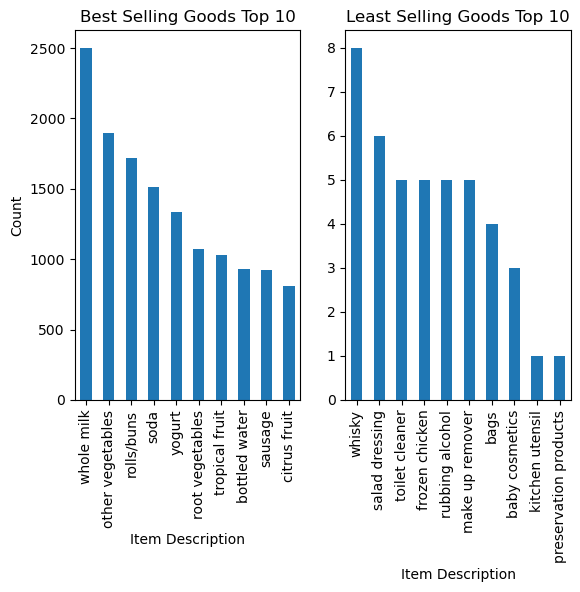

In [17]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
best_selling_goods.plot(ax = ax1,
                       kind = 'bar',
                       title = 'Best Selling Goods Top 10')
ax1.set_xlabel('Item Description')
ax1.set_ylabel("Count")

least_selling_goods.plot(ax = ax2,
                       kind = 'bar',
                       title = 'Least Selling Goods Top 10')
ax2.set_xlabel('Item Description')

ax1.set_xticklabels(best_selling_goods.index)

ax2.set_xticklabels(least_selling_goods.index)

plt.show()

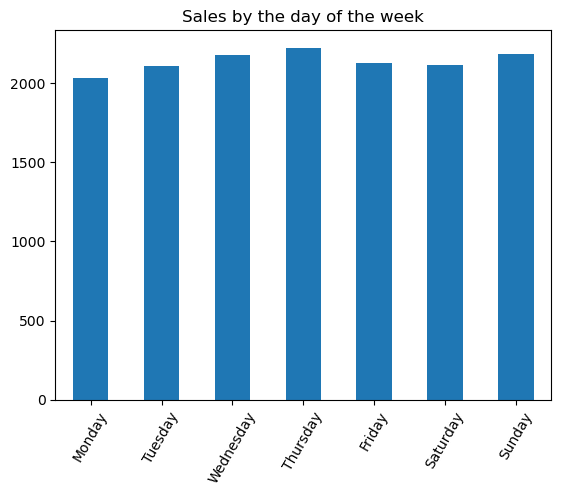

In [85]:
# 요일별 구매량
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df['day_of_week'].value_counts().reindex(day_order).plot(kind='bar',title = 'Sales by the day of the week')
plt.xticks(rotation = 60)
plt.show()


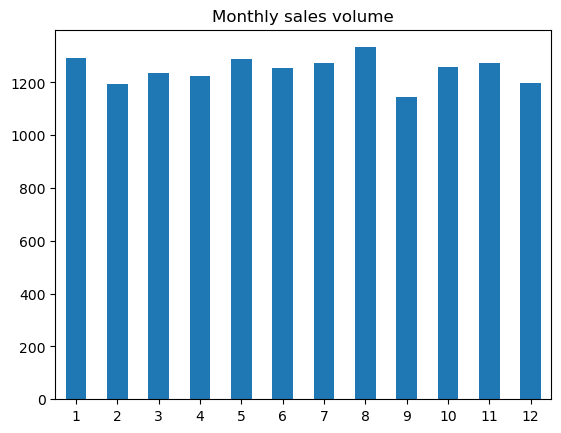

In [19]:
# 월별 구매량

df['month'].value_counts().reindex(list(range(1,13))).plot(kind='bar',title = 'Monthly sales volume')
plt.xticks(rotation = 0)
plt.show()

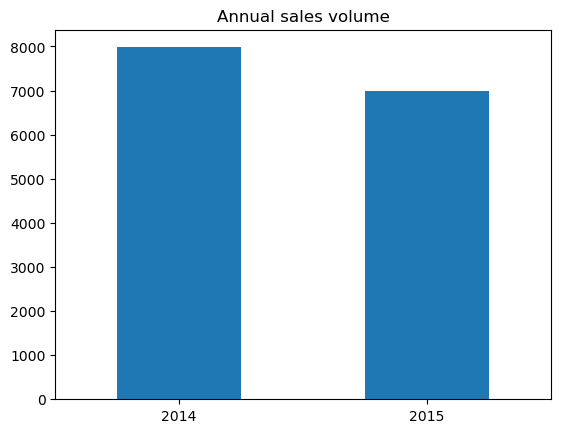

In [20]:
# 연도별 구매량
df['year'].value_counts().plot(kind='bar',title = 'Annual sales volume')
plt.xticks(rotation = 0)
plt.show()